<a href="https://colab.research.google.com/github/PanagiotisPetrid/ASTRO-BEAM-recruitment/blob/main/ASTRO_BEAM_recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Simulating a radio signal

##Creating an "off" signal

Steps 1-4 | Create a sample background signal and add gaussian noise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 1000 # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Created a sample signal using 2 random sin waves
background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))

# Plot the background signal
plt.plot(freq_range, background_signal)
plt.title("Background Signal")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

# Noise generation
# Genearte noise with same size as that of the data.
noise = np.random.normal(0, 0.1, len(background_signal)) #  μ = 0, σ = 0.1, size = length of background_signal

# Add the noise to the data.
background_signal_noised = background_signal + noise

# Plot the background signal with noise
plt.plot(freq_range, background_signal_noised)
plt.title("Background Signal with Noise")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

Steps 5-8 | Generate multiple sample background signals and generate a heatmap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters (same as before)
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)

# Defined a function to automate random sample signal generation
def generate_background_signal(freq_range):
    background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))
    noise = np.random.normal(0, 0.1, len(background_signal))
    background_signal_noised = background_signal + noise
    return background_signal_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_background_signal(freq_range)

#Visualize the waterfall as a heatmap
plt.imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
plt.title("Heatmap")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time Segment")
plt.colorbar(label="Relative Power")
plt.show()

##Creating an "on" signal

Steps 1-4 | Introducing the hydrogen line at 1420 MHz

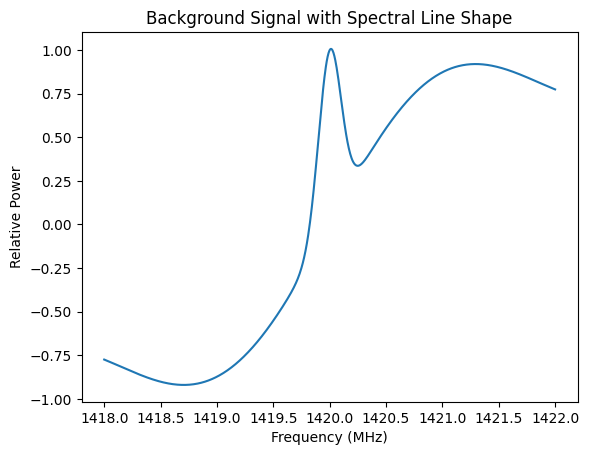

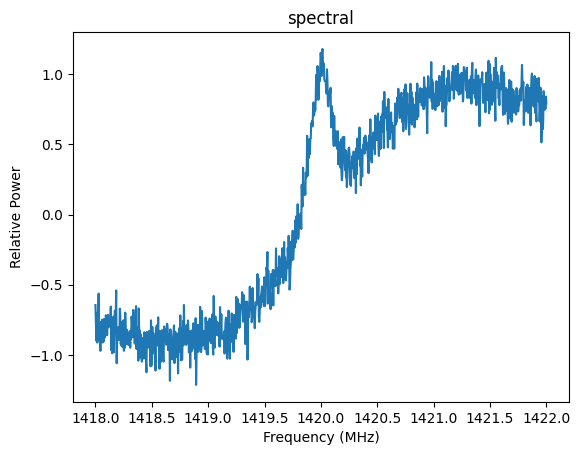

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 1000 # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Created a sample signal using 2 random sin waves
background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)

# Add the spectral_line_shape to the background signal
background_signal += spectral_line_shape

#Plot the background signal
plt.plot(freq_range, background_signal)
plt.title("Background Signal with Spectral Line Shape")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

# Noise generation
# Generate noise with same size as that of the data.
noise = np.random.normal(0, 0.1, len(background_signal)) #  μ = 0, σ = 0.1, size = length of background_signal

# Add the noise to the data.
background_signal_noised = background_signal + noise

# Plot the background signal with noise
plt.plot(freq_range, background_signal_noised)
plt.title("spectral")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

Steps 5-8 | Generate a heatmap for the "Spectral" signal for multiple time segments

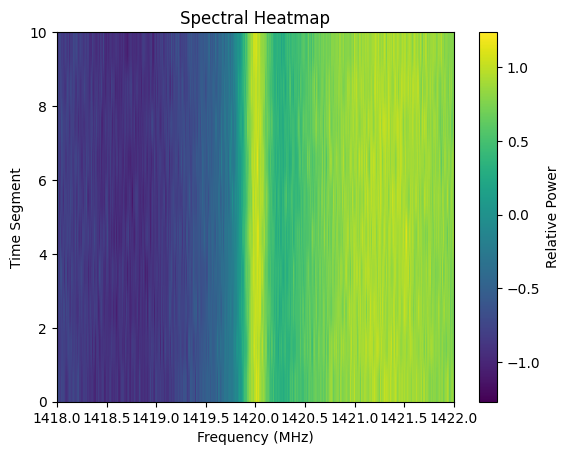

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters (same as before)
n_samples = 1000
freq_range = np.linspace(1418, 1422, n_samples)

# Defined a function to automate random sample signal generation
def generate_spectral_signal(freq_range):
    background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))
    noise = np.random.normal(0, 0.1, len(background_signal))
    background_spectral_noised = background_signal + noise # Add noise
    spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
    background_spectral_noised += spectral_line_shape # Add spectral line shape
    return background_spectral_noised

#Define the time segments we will use for our waterfall
n_time_segments = 10

# Create an empty array to store the signals for each time segment
waterfall = np.zeros((n_time_segments, n_samples))

for i in range (n_time_segments):
    waterfall[i, :] = generate_spectral_signal(freq_range)

#Visualize the waterfall as a heatmap
plt.imshow(waterfall, aspect='auto', cmap='viridis', extent=[freq_range[0], freq_range[-1], 0, n_time_segments])
plt.title("Spectral Heatmap")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time Segment")
plt.colorbar(label="Relative Power")
plt.show()

Gnerating the spactral line shape with twice the samples

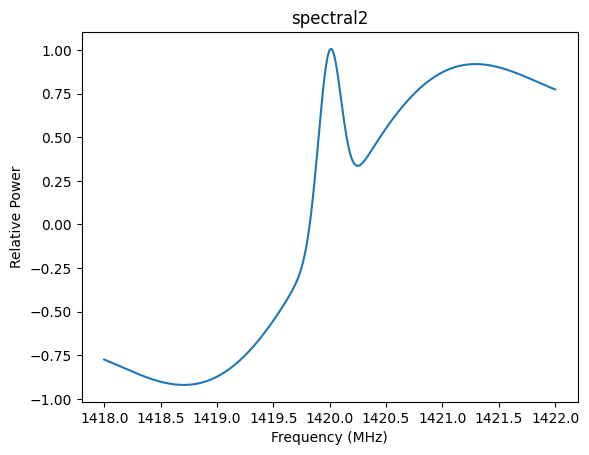

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 2000 # Twice the previous number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Created a sample signal using 2 random sin waves
background_signal = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))

# Add the spectral line at 1420 MHz
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)

# Add the spectral_line_shape to the background signal
background_signal += spectral_line_shape

#Plot the background signal
plt.plot(freq_range, background_signal)
plt.title("spectral2")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#2. Signal Smoothing

2.1 Averaging over time

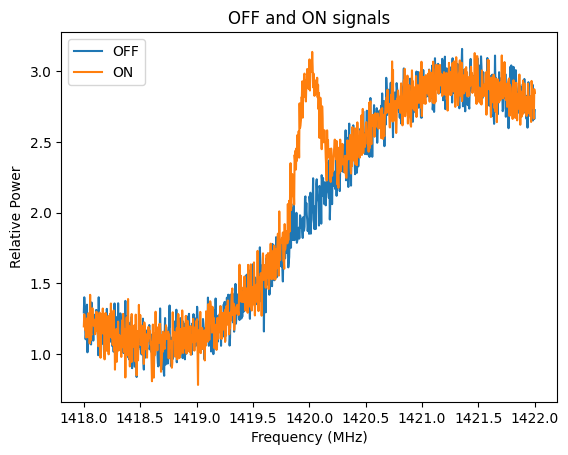

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
n_samples = 1000 # Number of sample measurements
freq_range = np.linspace(1418, 1422, n_samples)  # We create an evenly spaced list with frequencies of a signal (with a bandwidth of 4 MHz)

# Creating "OFF" signal according to previous steps
background_signal_OFF = (np.sin(2 * np.pi * 0.1 * freq_range) + 0.3 * np.sin(2 * np.pi * 0.3 * freq_range))
noise = np.random.normal(0, 0.1, len(background_signal_OFF))
signal_OFF = background_signal_OFF + noise + 2 #We add 2 to every element of the list so that we only have positive energy,
                                               #resulting in meaningful calibration (the relative power is arbitrary, either way)

#Create "ON" signal according to previous steps
background_signal_ON = background_signal_OFF
spectral_line_shape = np.exp(-0.5 * ((freq_range - 1420) / 0.1)**2)
background_signal_ON += spectral_line_shape
noise = np.random.normal(0, 0.1, len(background_signal_ON))
signal_ON = background_signal_ON + noise + 2 #We add 2 according to the comment made above

#Plot both the signals
plt.plot(freq_range, signal_OFF, label="OFF")
plt.plot(freq_range, signal_ON, label="ON")
plt.title("OFF and ON signals")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.legend()
plt.show()

2.2 Removing Background

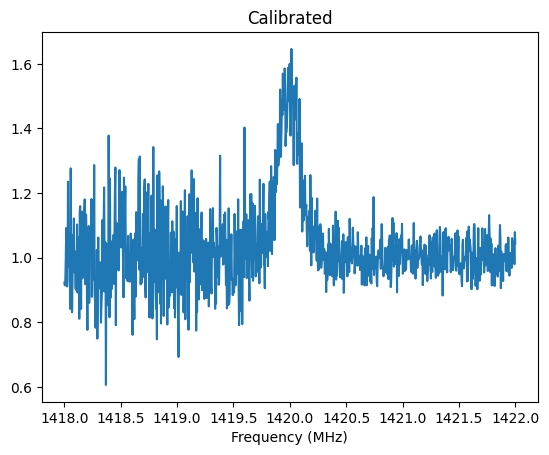

In [17]:
#Use on/off calibration to calibrate
calibrated_signal = signal_ON / signal_OFF

#Plot the calibrated signal
plt.plot(freq_range, calibrated_signal)
plt.title("Calibrated")
plt.xlabel("Frequency (MHz)")
plt.show()

2.3 Moving average

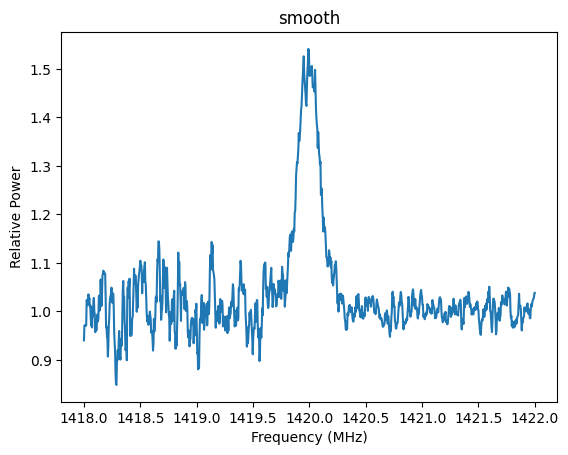

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Create an empty array to store the moving average values
smooth = np.zeros(len(freq_range))

# Smooth the first 3 points
smooth[0] = np.mean(calibrated_signal[:4])
smooth[1] = np.mean(calibrated_signal[:5])
smooth[2] = np.mean(calibrated_signal[:6])

# Smooth each point with the previous and next 3 points (N = 7, so that (N-1)/2 = 3)
for i in range(3, len(freq_range) - 3):
    smooth[i] = np.mean(calibrated_signal[i-3:i+3])

# Smooth the last 3 points
smooth[-3] = np.mean(calibrated_signal[-6:])
smooth[-2] = np.mean(calibrated_signal[-5:])
smooth[-1] = np.mean(calibrated_signal[-4:])

# Plot the smoothed signal
plt.plot(freq_range, smooth)
plt.title("smooth")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

#3. Spectral Line Detection

Identifying the frequency where the spectral line peaks

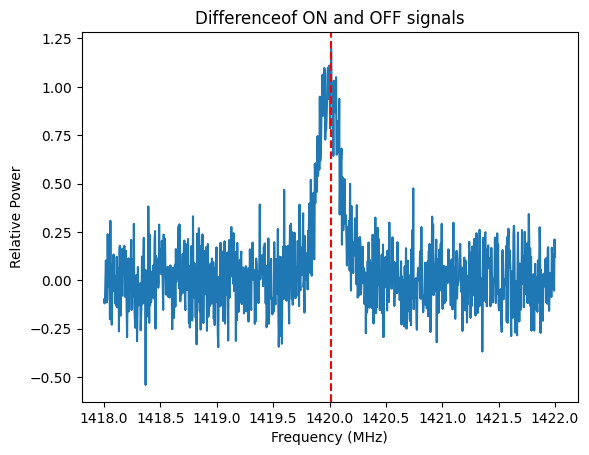

In [27]:
#We find the peak of the spectral line by subtracting the OFF signal from the ON signal and finding the max value of the difference
peak_index = np.argmax(signal_ON - signal_OFF)
peak_freq = freq_range[peak_index]

#We plot the difference of the signals, along with a vertical line showing where the peak is found
plt.plot(freq_range, signal_ON - signal_OFF)
plt.axvline(x=peak_freq, color='r', linestyle='--')
plt.title("Differenceof ON and OFF signals")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()

Calculating the SNR(db)

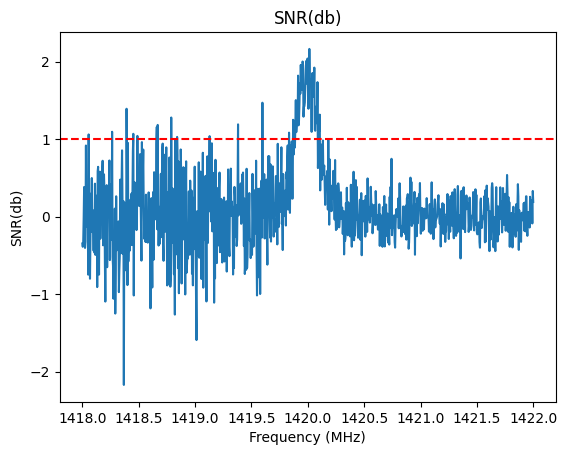

In [30]:
#We calculate SNR by dividing the ON signal by the OFF signal and converting it to decibels
SNR = 10 * np.log10(signal_ON / signal_OFF)

#Plot the SNR(db) along with a horizontal line, showing where the SNR(db) is higher than 1
plt.plot(freq_range, SNR)
plt.axhline(y=1, color='r', linestyle='--')
plt.title("SNR(db)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("SNR(db)")
plt.show()

#4. Upsamping

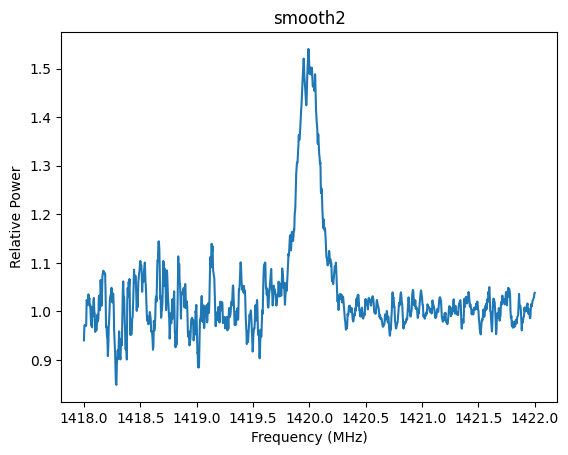

In [33]:
#We upsample the smooth signal by using linear interpolation, doubling its sample size (from 1000 to 2000 samples)
upsampled_smooth = np.interp(np.linspace(freq_range[0], freq_range[-1], 2000), freq_range, smooth)

#Plot the upsampled signal
plt.plot(np.linspace(freq_range[0], freq_range[-1], 2000), upsampled_smooth)
plt.title("smooth2")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power")
plt.show()